In [1]:
from PIL import Image
import numpy as np

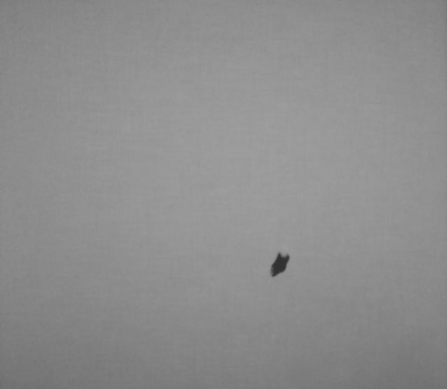

Image size:  (447, 389)
Image mode:  L


In [2]:
input_image = Image.open("images/fabric.png").convert("L")
display(input_image)

print("Image size: ", input_image.size)
print("Image mode: ", input_image.mode)

In [3]:
def local_histogram_equalization(input_image, window_size):
    input_image = np.array(input_image)
    output_image = np.zeros(input_image.shape)
    pad = window_size // 2
    input_image = np.pad(input_image, pad, mode='reflect')
    for i in range(pad, input_image.shape[0] - pad):
        for j in range(pad, input_image.shape[1] - pad):
            window = input_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            hist = np.zeros(256)
            for x in range(window_size):
                for y in range(window_size):
                    hist[window[x, y]] += 1
            hist /= window_size ** 2
            cdf = np.zeros(256)
            cdf[0] = hist[0]
            for k in range(1, 256):
                cdf[k] = cdf[k - 1] + hist[k]
            cdf *= 255
            cdf = cdf.astype(np.uint8)
            output_image[i - pad, j - pad] = cdf[input_image[i, j]]
    return output_image

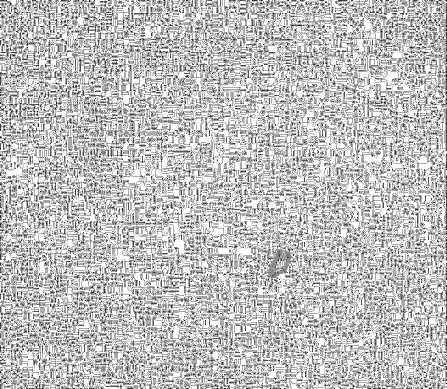

In [4]:
output_image = local_histogram_equalization(input_image, 3)
output_image = Image.fromarray(output_image).convert("L")
display(output_image)

In [5]:
output_image.save("images/fabric_local_histogram_equalization.png")